## 매개변수 갱신 

신경망 학습의 목적은 손실 함수의 값을 가능한 낮추는 매개변수를 찾는 것이다. 이는 곧 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 최적화라고 한다. 



## 확률적 경사 하강법 (SGD) 

<img src="https://t1.daumcdn.net/cfile/tistory/9978B5465AA8029F22" width="200" height="300"/> 

W는 갱신할 가중치 매개변수이고 미분값은 W에 대한 손실 함수의 기울기 이다. n는 학습률의 의미한다. <-는 우변의 값으로 좌변의 값을 갱신한다는 뜻이다. 





In [1]:
class SGD :
    def __init__ (self, lr = 0.01)  :
        self.lr = lr
        
    def update (self, params, grads) :
        for k in params.keys() :
            params[k] -= self.lr * grads[k ]

### SGD 의 단점 

SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있다. SGD는 비등방성(anisotropy)함수이기 때문이다. 방향에 따라 성질, 즉 기울기가 달라진다는 의미이다. SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리켜서라는 점도 고려해봐야 한다. 

## 모멘텀(Momentum) 

<img src="https://blog.kakaocdn.net/dn/bmYcIj/btqJZopKIwQ/BTg82XwDLnVH2rsxZBnXEK/img.png" width="200" height="300"/> 

다른 변수들은 SGD와 동일하고 v라는 변수는 물리에서 말하는 속도에 해당한다. 기울기 방향으로 힘을 받아 물체가 가속된다는 물리법칙을 나타낸다.  
av항은 물체가 아무런 힘을 받지 않은 때 서서히 하강 시키는 역할을 하는 변수이다. 물리에서의 지면 마찰이나 공기 저항에 해당된다. 

In [2]:
class Momentum :
    def __init__ (self, lr = 0.01, m = 0.9) :
        self.lr = lr
        self.m = m
        self.v = None
        
    def updare(self, params, grads) :
        if self.v is None :
            self.v = {}
            for k , val in params.items() :
                self.v[k] = np.zeros_like(val)
                
        for k in params.keys() :
            self.v[k] = self.m * self.v[k] - self.lr * grads[k]
            params[k] += self.v[k]

모멘텀는 지그재그 정도가 덜하다. 이는 x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문이다. 거꾸로 y축은 힘은 크지만 위아래로 번갈아 힘을 받아 상충하게 되며 y축 방향의 속도는 안정적이지 않다. 

## AdaGrad 

신경망 학습에서는 학습률 값이 중요하다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 학습이 제대로 이루어지지 않는다. 

이 학습률을 정하는 효과적 기술로 **학습률 감소,learning rate decay**가 있다. 이는 학습을 진행하면서 학습률을 점차 줄여가는 방법이다. 처음에는 크게 학습하다가 조금씩 작게 학습한다는 의미로, 실제 신경망 학습에 자주 쓰인다. 

학습률을 서서히 낮추는 가장 간단한 방법은 매개변수'전체'의 학습률 값을 일괄적으로 낮추는 것이다. 이를 더욱 발전시킨 것이 **AdaGrad**이다. AdaGrad는 각각의 매매변수에 맞춤형 값을 만들어 준다. 

----- 

AdaGrad는 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행한다. 
<img src="https://blog.kakaocdn.net/dn/H8MY9/btqJ0owhSUL/j7keQZ0PVQfy7RMS9F9tyK/img.png" width="200" height="300"/> 
마찬가지로 W는 갱신할 가중치 매개변수, 편미분 값은 W에 대한 손실함수의 기울기, n는 학습률을 의미한다. h라는 변수가 나오는데 h는 기존 기울기 값을 제곱하여 계속 더해준다. 그리고 매개변수를 갱신할 때 $ 1/\sqrt{h}$ 을 곱해 학습률을 조정한다. 매개변수의 원소 중에서 많이 움직인 원소를 학습률이 낮아진다는 뜻인데, **학습률 감소가 매개변수의 원소마다 다르게 적용됨을 의미한다.** 

-------

AdaGrad는 과거의 기울기를 제곱하여 계속 더해간다. 학습을 진행할 수록 갱신 강도가 약해진다. 실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않게 된다. 이 문제를 개선한 기법으로 RMSProp이라는 방법이 존재한다. RMSProp은 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 먼 과거의 기울기를 서서히 잊고 새로운 기울기 정보를 크게 반영한다. 이를 **지수이동평균**이라 하여, 과거 기울기의 반영 규모를 기하급수적으로 감소 시킨다. 

In [3]:
class AdaGrad :
    def __init__(self, lr = 0.01) :
        self.lr =lr 
        self.h = None
        
    def update (self, params, grads) :
        if self.h in None :
            self.h = {} 
            for k , v in params, items () :
                self.h[k] = np.zeros_like(v)
                
        for k in params.keys () :
            self.h[k] += grads[k] + grads[k]
            params[k] -= self.lr * grads[k] / (np.sqrt(self.h[k]) + 1e-7)            

마지막 줄에 le-7 값을 더해주는 것에 주의, 이 작은 값은 self.h[k]에 0이 담겨 있다 해도 0으로 나누는 사태를 막는다. 대부분의 딥러닝 프레임워크에서는 이값도 인수로 설정할 수 있다. 

----

<img src="https://3.bp.blogspot.com/-1bnQACapxp8/WaUKGz2zy8I/AAAAAAAAAM8/9R5gIpRb0JQ7zMDWdI9f6yVCdbva-ICtgCLcBGAs/s400/adagrad.png" width="400" height="300"/> 

y 축 방향은 기울기가 커서 처믕에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정된다. 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다. 

## Adam 

모멘텀은 공기 그릇 바닥을 구르는 듯한 움직임을 보였다. AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다. 이 둘을 융합한 것이 Adam이다. 
하이퍼파라미터의 편향 보정이 진행된다는 점이 특징이다. 

In [4]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

<img src="https://blog.kakaocdn.net/dn/KZaLP/btqJ4FYkYOb/aaCOENlEHCLE0z2i4h8fj1/img.png" width="400" height="300"/> 

4번째인 Adam의 갱신 과정도 그릇 바닥을 구르듯 움직인다. 모멘텀과 비슷한 패턴인데, 모멘텀 때보다 공의 좌우 흔들림이 적다. 이는 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택이다. Adam은 하이퍼파라미터를 3개 설정한다. 하나는 지금까지의 학습률, 나머지 두개는 일차 모텐텀요 계수 B1과 이차 모멘텀용 계수 B2이다. 논문에 따르면 기본 설정값은 B1은 0.9, B2는 0.999이며, 이 값이면 많은 경우에 좋은 결과를 얻을 수 있다. 

----- 

어떤 최적화 방법을 써야 하는지는 풀어야할 문제가 무엇이냐에 따라 달라진다. 또한 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 바뀐다. 

## MNIST 데이터셋으로 갱신 방법 비교 

===========iteration:0===========
SGD:2.3623741266046996
Momentum:2.3780730364761817
AdaGrad:1.9290347407730137
Adam:2.2028000363869467
===========iteration:100===========
SGD:1.5314447976988377
Momentum:0.4091860490324482
AdaGrad:0.22121173342562206
Adam:0.2513667664920221
===========iteration:200===========
SGD:0.7604266944022355
Momentum:0.2767295831585761
AdaGrad:0.11818827000393281
Adam:0.19076142906279075
===========iteration:300===========
SGD:0.6267849982807433
Momentum:0.21156400394211403
AdaGrad:0.09607839318728585
Adam:0.15918794627559124
===========iteration:400===========
SGD:0.4230083451724031
Momentum:0.17537931348679608
AdaGrad:0.10179871334560896
Adam:0.15803957095390944
===========iteration:500===========
SGD:0.44683763479006655
Momentum:0.14210964406212173
AdaGrad:0.06053326208171746
Adam:0.0775840662859805
===========iteration:600===========
SGD:0.34609049896586286
Momentum:0.1451330566185159
AdaGrad:0.05879083771681573
Adam:0.07546312019443176
===========iteration:

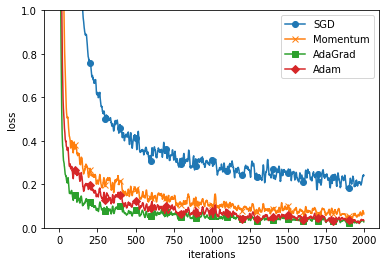

In [5]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()